# Proton Energy Loss Correction using GEMC
 
FD proton inbending: [APSApril/ProtonMomentumCorrection3.ipynb](APSApril/ProtonMomentumCorrection3.ipynb)

FD proton outbending: [ProtonMomentumCorrection4.ipynb](ProtonMomentumCorrection4.ipynb)

CD protons: [ProtonMomentumCorrection5.ipynb](ProtonMomentumCorrection5.ipynb)

I update FD proton inbending correction because of the issue delivered in [ProtonMomentumCorrection7.ipynb](ProtonMomentumCorrection7.ipynb). Some protons reconstructed in FTOF2 for inbending electron setup, has an issue that the $\delta p$ vs. $p$ 2D histogram shows two strips.

## Load Libs

In [1]:
import pandas as pd
import numpy as np
from utils.const import *
from utils.physics import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


In [4]:
from os import listdir

In [5]:
inb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/ProtonStudies/442/protons_inb.pkl")
outb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/ProtonStudies/442/protons_outb.pkl")

In [9]:
inb.loc[:, "DC1theta"] = getTheta([inb.PDc1Hitx, inb.PDc1Hity, inb.PDc1Hitz])
outb.loc[:, "DC1theta"] = getTheta([outb.PDc1Hitx, outb.PDc1Hity, outb.PDc1Hitz])


In [10]:
inb_FD = inb.loc[inb.Psector<7, :]
inb_CD = inb.loc[inb.Psector>7, :]
outb_FD = outb.loc[outb.Psector<7, :]
outb_CD = outb.loc[outb.Psector<7, :]

In [11]:
def func(x, t, y):
    return corr(x,t) - y

def corr(x, t):
    x0, x1, x2, x3 = x
    return x0 + x1*np.power(t-np.ones(len(t))*0.3, x3)

In [15]:
params = [-53.14680163254601, 79.61307254040804, 0.3, 0.05739232362022314]#best_params#-52.99936209624629, 80.6709735338239, 0.3, 0.06899530845080828]#best_params#[-72.5, 100, 0.3, 0.055]#[-55.5, 80, 0.3, 0.04]
inbending_check1 = inb_FD.loc[inb_FD.DC1theta < corr(params, inb_FD.Pp), :]
inbending_check2 = inb_FD.loc[inb_FD.DC1theta > corr(params, inb_FD.Pp), :]

In [16]:
inbending_1 = inb_FD.loc[inb_FD.GenPp - inb_FD.Pp - 0.4*0.022/inb_FD.Pp**1.5<0, :]
inbending_2 = inb_FD.loc[inb_FD.GenPp - inb_FD.Pp - 0.4*0.022/inb_FD.Pp**1.5>0, :]

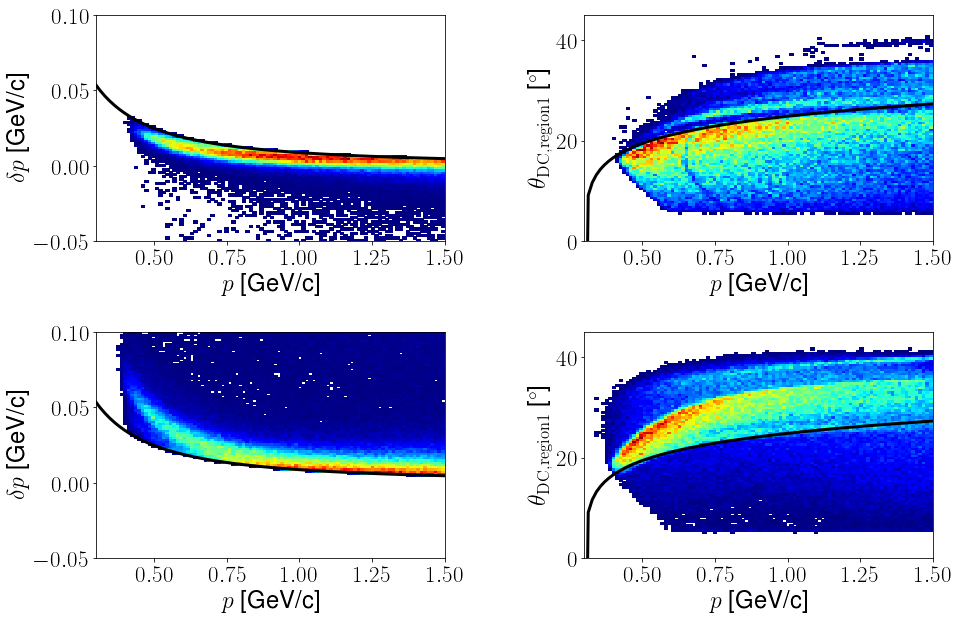

In [19]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$p$"+" ["+GeVc+"]")
        if col == 0:
            axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")
        else:
            axs[row, col].set_ylabel(r"$\theta_{\mathrm{DC, region 1}}$"+" ["+degree+"]")
            
axs[0, 0].hist2d(inbending_1.Pp, inbending_1.GenPp - inbending_1.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(inbending_2.Pp, inbending_2.GenPp - inbending_2.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(inbending_1.Pp, inbending_1.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(inbending_2.Pp, inbending_2.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
# axs[1, 1].hist2d(Ftof2_inb_nocorr_1.Pp, Ftof2_inb_nocorr_1.GenPp - Ftof2_inb_nocorr_1.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
t = np.linspace(0.03, 1.7, 101)
axs[0, 0].plot(t, 0.4*0.022/t**1.5, color = 'k', linewidth = 3)
axs[1, 0].plot(t, 0.4*0.022/t**1.5, color = 'k', linewidth = 3)
t = np.linspace(0.3, 1.7, 101)
axs[0, 1].plot(t, corr(params, t), color = 'k', linewidth = 3)
axs[1, 1].plot(t, corr(params, t), color = 'k', linewidth = 3)

# axs[0, 0].set_title("Inbending, Forward Detector")
# axs[0, 1].set_title("Inbending, Central Detector")
# axs[1, 0].set_title("Outbending, Forward Detector")
# axs[1, 1].set_title("Outbending, Central Detector")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
# plt.tight_layout()
# plt.savefig('separator1.pdf')

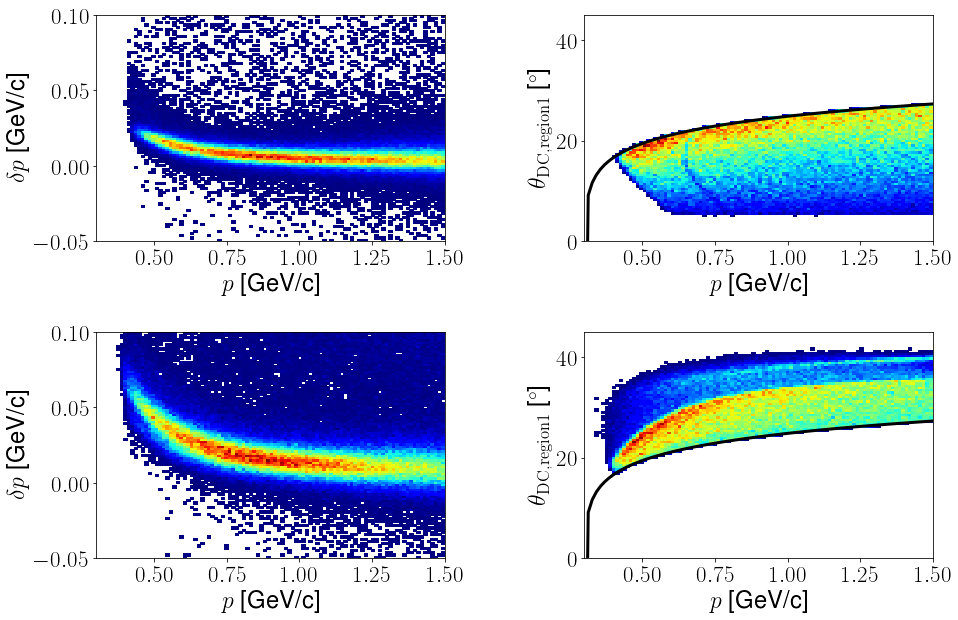

In [21]:
fig, axs = plt.subplots(2,2, figsize = (15, 10))
for row in range(2):
    for col in range(2):
#         ind =col+2*row
        axs[row, col].set_xlabel(r"$p$"+" ["+GeVc+"]")
        if col == 0:
            axs[row, col].set_ylabel(r"$\delta p$"+" ["+GeVc+"]")
        else:
            axs[row, col].set_ylabel(r"$\theta_{\mathrm{DC, region 1}}$"+" ["+degree+"]")
            
axs[0, 0].hist2d(inbending_check1.Pp, inbending_check1.GenPp - inbending_check1.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[1, 0].hist2d(inbending_check2.Pp, inbending_check2.GenPp - inbending_check2.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].hist2d(inbending_check1.Pp, inbending_check1.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
axs[1, 1].hist2d(inbending_check2.Pp, inbending_check2.DC1theta, bins = [np.linspace(0.3, 1.5, 101), np.linspace(0, 45, 101)], cmap = cmap, cmin = 1)
# axs[1, 1].hist2d(Ftof2_inb_nocorr_1.Pp, Ftof2_inb_nocorr_1.GenPp - Ftof2_inb_nocorr_1.Pp, bins = [np.linspace(0.3, 1.5, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin = 1)
axs[0, 1].plot(t, corr(params, t), color = 'k', linewidth = 3)
t = np.linspace(0.3, 1.7, 101)
axs[1, 1].plot(t, corr(params, t), color = 'k', linewidth = 3)

# axs[0, 0].set_title("Inbending, Forward Detector")
# axs[0, 1].set_title("Inbending, Central Detector")
# axs[1, 0].set_title("Outbending, Forward Detector")
# axs[1, 1].set_title("Outbending, Central Detector")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
# plt.tight_layout()
# plt.savefig('separator2.pdf')

In [36]:
def fun(x, t, y):
    return x[0] + x[1]/t - y

def correction(x, t):
    x0, x1 = x
    return x0 + x1/t

def fun2(x, t, y):
    return x[0] + x[1]*t- y
def correction2(x, t):
    x0, x1 = x
    return x0 + x1*t

def fun3(x, t, y):
    return x[0] + x[1]*t + x[2]*t*t - y
def correction3(x, t):
    x0, x1, x2 = x
    return x0 + x1*t + x2*t*t

def fun4(x, t, y):
    return x[0] + x[1]*np.exp(x[2]*t) - y
def correction4(x, t):
    x0, x1, x2 = x
    return x0 + x1*np.exp(x2*t)

def fun5(x, t, y):
    return correction5(x, t) - y
def correction5(x,t):
    x0, x1, x2, x3 = x
    return x0 + x1*t + x2*t*t +x3*t*t*t

def fun6(x, t, y):
    return correction6(x,t) - y
def correction6(x, t):
    x0, x1 = x
    return x0 + x1/t**2

def fun7(x, t, y):
    return correction7(x,t) - y
def correction7(x, t):
    x0, x1 = x
    return x0 + x1/t

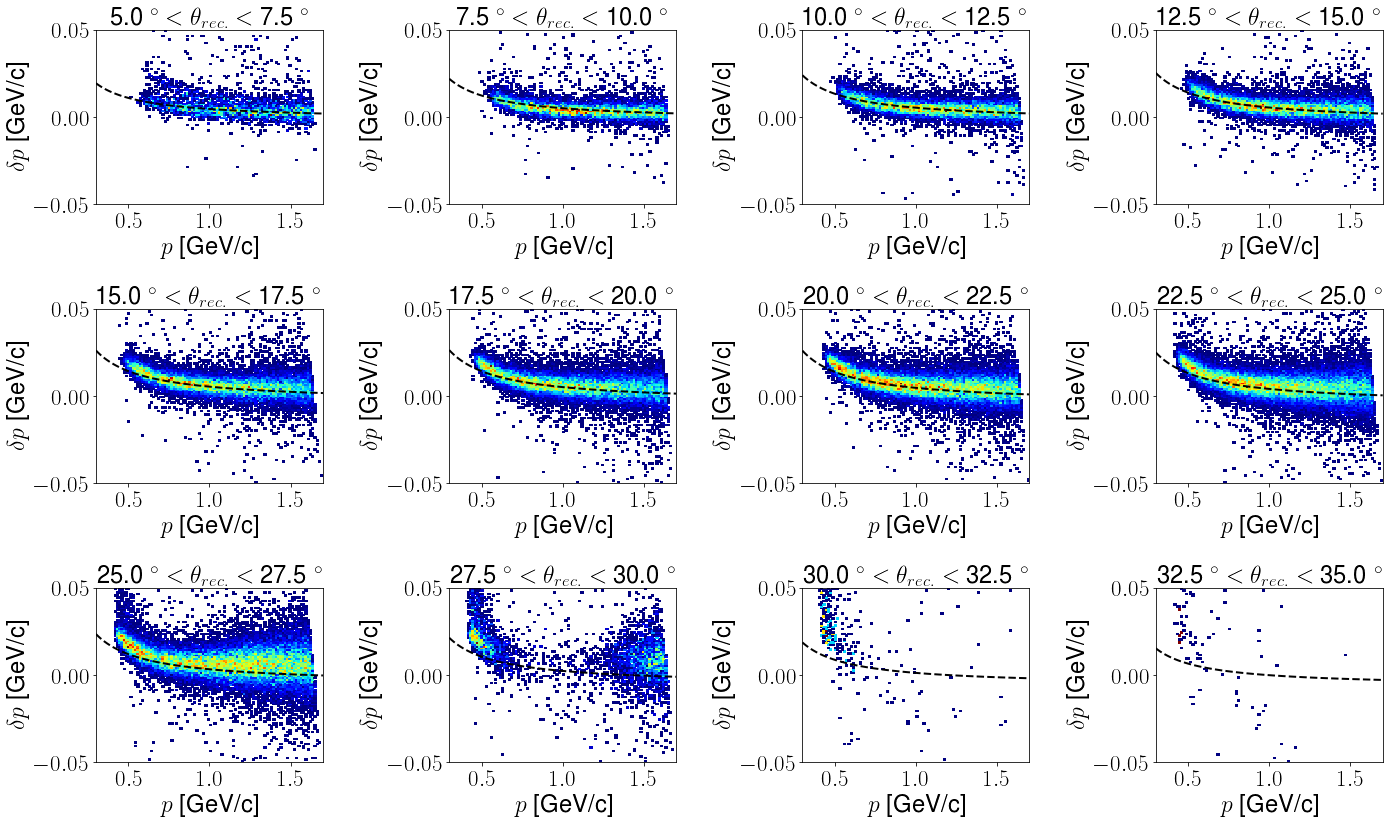

In [26]:
x = np.linspace(0, 11, 12)*2.5+ 5 + 1.25
fig, axs = plt.subplots(3,4, figsize=(20,12))
param1_p, param2_p = [-0.00051894, -0.00018104], [ 3.29466917e-03,  5.73663160e-04, -1.40807209e-05]
for row in range(3):
    for col in range(4):
        ind =col+4*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check1.Ptheta >= 2.5*ind+5) & (inbending_check1.Ptheta < 2.5*(ind+1)+5)
        axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], inbending_check1.loc[thetaCond, "GenPp"] - inbending_check1.loc[thetaCond, "Pp"], bins = [np.linspace(0.3, 1.7, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]

        param = [correction2(param1_p, x[ind]), correction3(param2_p, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.3, 1.7, 101), correction(param, np.linspace(0.3, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2.5*ind+5)+" "+degree + r" $<\theta_{rec.}<$ " + str(2.5*(ind+1)+5)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("protonFD_inb_mom_1.pdf")

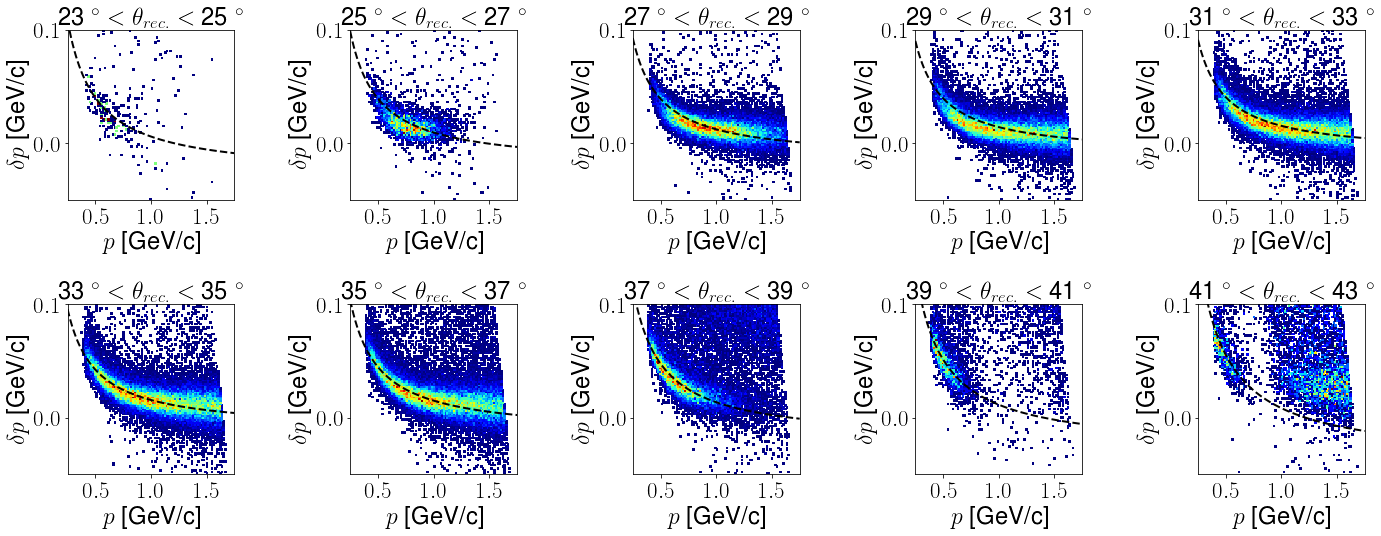

In [27]:
fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check2.Ptheta >= 2*ind+23) & (inbending_check2.Ptheta < 2*(ind+1)+23)
        axs[row, col].hist2d(inbending_check2.loc[thetaCond, "Pp"], inbending_check2.loc[thetaCond, "GenPp"] - inbending_check2.loc[thetaCond, "Pp"], bins = [np.linspace(0.25, 1.75, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin =1)
        theta = np.linspace(23, 41, 10)[ind]+1
        const_FD = -3.03346359*10**(-1) + 1.83368163*10**(-2)*theta - 2.86486404*10**(-4)*theta*theta
        coeff_FD =  2.01023276*10**(-1) - 1.13312215*10**(-2)*theta + 1.82487916*10**(-4)*theta*theta

        param = [const_FD, coeff_FD]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction(param, np.linspace(0.25, 1.75, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+23)+" "+degree + r" $<\theta_{rec.}<$ " + str(2*(ind+1)+23)+" "+degree)
plt.tight_layout()
plt.savefig("protonFD_inb_mom_2.pdf")

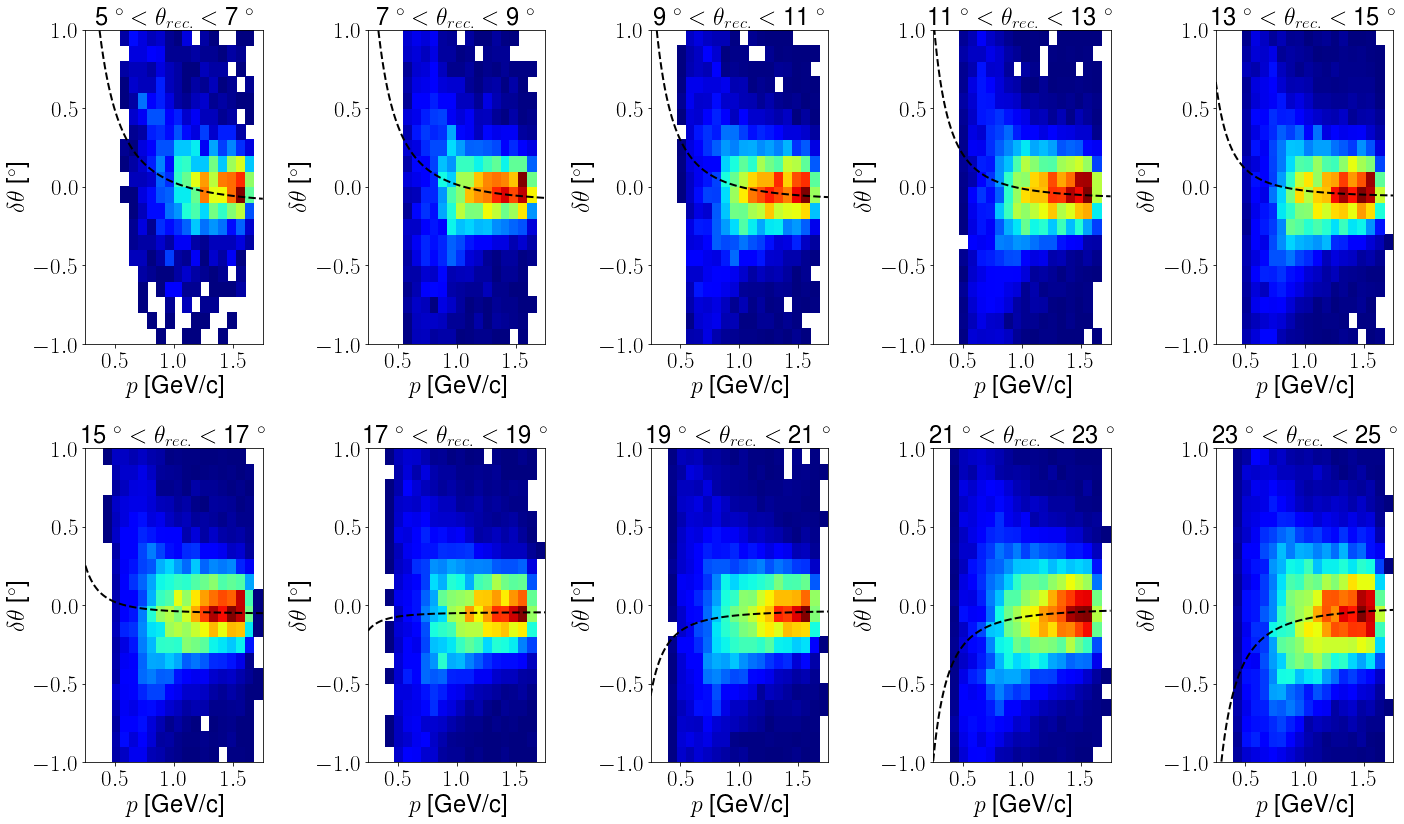

In [42]:
x = np.linspace(0, 9, 10)*2+1+5
fig, axs = plt.subplots(2,5, figsize=(20,12))
param1_theta, param2_theta = [-0.16742969 , 0.00697925], [ 0.23352115, -0.01338697]
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check1.Ptheta >= 2*ind+5) & (inbending_check1.Ptheta < 2*(ind+1)+5)
#         param = params_theta[ind]
#         axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], inbending_check1.loc[thetaCond, "GenPtheta"] - inbending_check1.loc[thetaCond, "Ptheta"] - correction4(param, inbending_check1.loc[thetaCond, "Pp"]), bins = [np.linspace(0.3, 1.7, 21), np.linspace(-1, 1 , 21)], cmap = cmap, cmin =1)
        axs[row, col].hist2d(inbending_check1.loc[thetaCond, "Pp"], inbending_check1.loc[thetaCond, "GenPtheta"] - inbending_check1.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.25, 1.75, 21), np.linspace(-1, 1 , 21)], cmap = cmap, cmin =1)
        theta = (ind) + 5 + 0.5 
        param = [correction2(param1_theta, x[ind]), correction2(param2_theta, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction6(param, np.linspace(0.25, 1.75, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_ylim(-2, 2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+5)+" "+degree + r" $<\theta_{rec.}<$ " + str(2*(ind+1)+5)+" "+degree)
plt.tight_layout()
# plt.show()
# plt.savefig("correction_p_result.pdf")
# plt.savefig("protonFD_inb_theta_1.pdf")

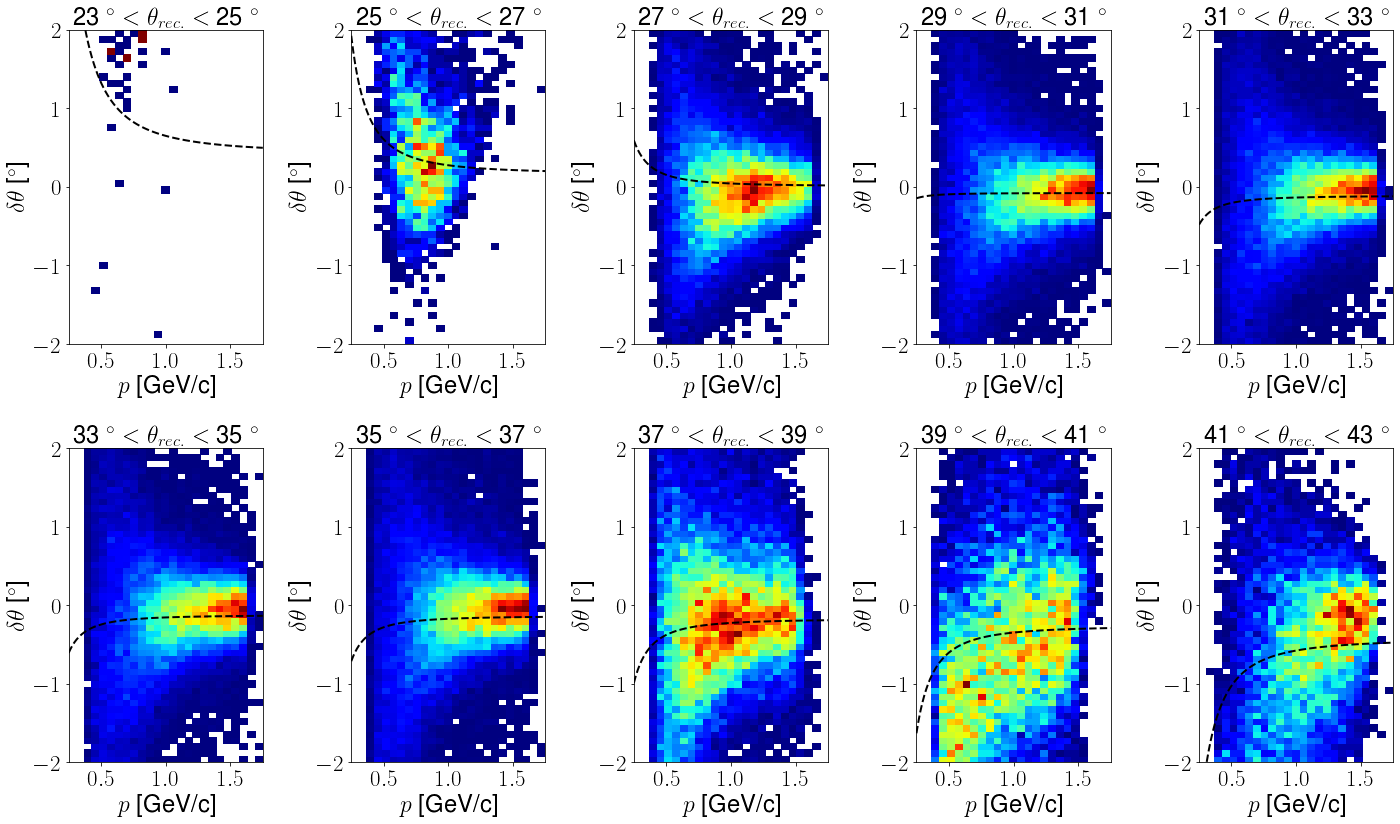

In [44]:
x = np.linspace(0, 9, 10)*2+23+1
fig, axs = plt.subplots(2,5, figsize=(20,12))
param1_theta, param2_theta = [ 2.04334532e+01, -1.81052405e+00,  5.32556360e-02, -5.23157558e-04], [ 8.74233279e+00, -7.63869344e-01,  2.22376362e-02, -2.16457260e-04]
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inbending_check2.Ptheta >= 2*ind+23) & (inbending_check2.Ptheta < 2*(ind+1)+23)
        axs[row, col].hist2d(inbending_check2.loc[thetaCond, "Pp"], inbending_check2.loc[thetaCond, "GenPtheta"] - inbending_check2.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.25, 1.75, 26), np.linspace(-2, 2 , 51)], cmap = cmap, cmin =1)
        theta = 2*ind + 23 + 1
#         const_FD = np.select([theta<30, (theta>=30)],
#                           [2.98140652*10**(2) - 2.75743096*10**(1)*theta + 8.35818159*10**(-1)*theta*theta - 8.26147941*10**(-3)*theta*theta*theta, 1.34032831*10**(2) - 1.12452272*10**(1)*theta + 3.12125195*10**(-1)*theta*theta -2.86545130*10**(-3)*theta*theta*theta])
#         coeff_FD = np.select([theta<30, (theta>=30)],
#                           [1.82790220*10**(6) - 1.98950907*10**(5)*theta + 7.20647164*10**(3)*theta*theta - 8.68597440*10**(1)*theta*theta*theta, 9.37101732*10**(2) - 7.92142664*10**(1)*theta + 2.22452861*theta*theta -2.08191298*10**(-2)*theta*theta*theta])    
#         coeff2_FD = np.select([theta<30, (theta>=30)],
#                           [1.09369187*10**(4) - 1.29345623*10**(3)*theta + 5.07524944*10**(1)*theta*theta - 6.61520585*10**(-1)*theta*theta*theta, 1.02129004*10**(3) - 8.43398593*10**(1)*theta + 2.29760161*theta*theta  -2.07085860*10**(-2)*theta*theta*theta])
#             param = [0.0264, -1.464, -3.4769]
#         else:
#             param = [0.50047232 -0.03834672 *theta + 0.00071967*theta*theta, 74.99891704  -6.1576777*theta + 0.11469137*theta*theta, 47.71351973 -4.34918241*theta + 0.08841191*theta*theta]
#         param = [const_FD, coeff_FD, coeff2_FD]
#         print(theta, param,)
#         param = params_theta[ind]
        param = [correction5(param1_theta, x[ind]), correction5(param2_theta, x[ind])]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.75, 101), correction6(param, np.linspace(0.25, 1.75, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+23)+" "+degree + r" $<\theta_{rec.}<$ " + str(2*(ind+1)+23)+" "+degree)
plt.tight_layout()
# plt.show()
# plt.savefig("protonFD_inb_theta_2.pdf")

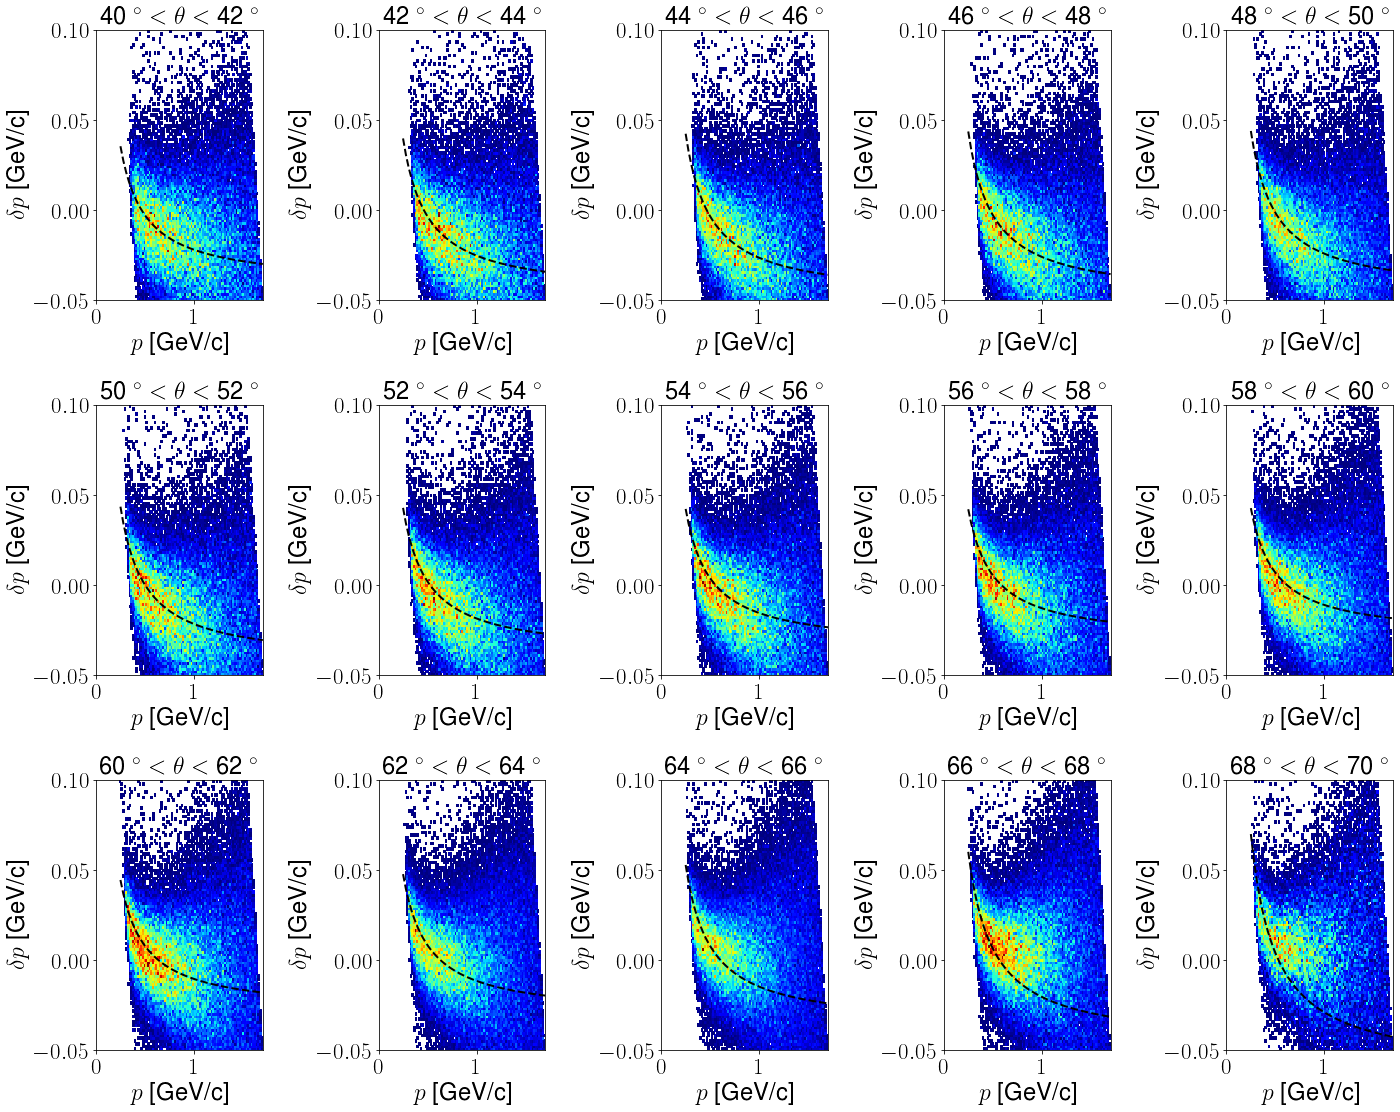

In [57]:
fig, axs = plt.subplots(3,5, figsize=(20,16))
for row in range(3):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (inb_CD.Ptheta >= 2*(ind)+40) & (inb_CD.Ptheta < 2*(ind+1)+40)
        theta = 2*(ind)+41
        axs[row, col].hist2d(inb_CD.loc[thetaCond, "Pp"], inb_CD.loc[thetaCond, "GenPp"] - inb_CD.loc[thetaCond, "Pp"], bins = [np.linspace(0, 1.7, 101), np.linspace(-0.05, 0.1, 101)], cmap = cmap, cmin =1)
#         param = params_p[ind]
        param = [correction5([ 1.93686914e+00, -1.16288824e-01,  2.23685833e-03, -1.40771969e-05], theta), correction5([-7.38047800e-01,  4.43343685e-02, -8.50985972e-04,  5.36810280e-06], theta)]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.25, 1.7, 51), correction(param, np.linspace(0.25, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+GeVc+"]")
        axs[row, col].set_title(str(2*ind+40)+" "+degree + r" $<\theta<$ " + str(2*(ind+1)+40)+" "+degree)
plt.tight_layout()
# plt.show()
plt.savefig("gemc442_results.pdf")

## Check Andrey's inbending

In [4]:
test = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/ProtonStudies/andrey.pkl")

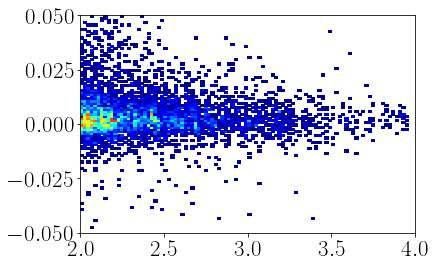

In [21]:
plt.hist2d(test.Pp, (test.GenPp - test.Pp)/test.Pp, bins = [np.linspace(2, 4, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin = 1)
plt.show()

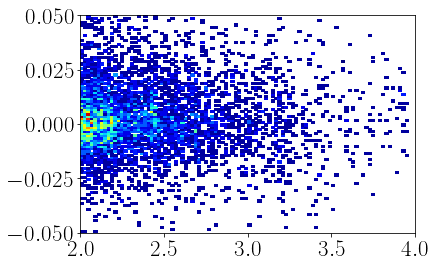

In [9]:
plt.hist2d(test.Pp, test.GenPp - test.AndreyPp, bins = [np.linspace(2, 4, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin = 1)
plt.show()

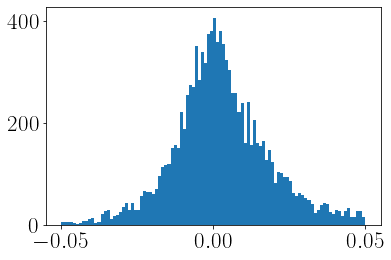

In [16]:
test = test.loc[test.Pp > 2, :]
plt.hist(test.GenPp - test.AndreyPp, bins = np.linspace(-0.05, 0.05, 101))
plt.show()

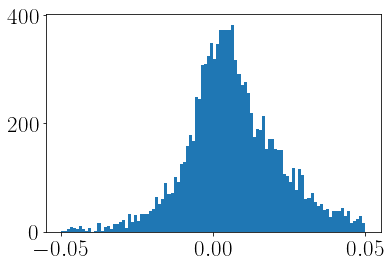

In [17]:
plt.hist(test.GenPp - test.Pp, bins = np.linspace(-0.05, 0.05, 101))
plt.show()

In [18]:
(test.GenPp - test.Pp).mean()

0.010041217051752524

In [19]:
(test.GenPp - test.AndreyPp).mean()

0.005178015314043161

In [20]:
len(test)

11787

In [43]:
corr = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/data/dvcs_inb_corr.pkl")
noCorr = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/data/dvcs_inb_noCorr.pkl")

In [44]:
corr = corr.loc[corr.Ptheta<65, :]

<AxesSubplot:>

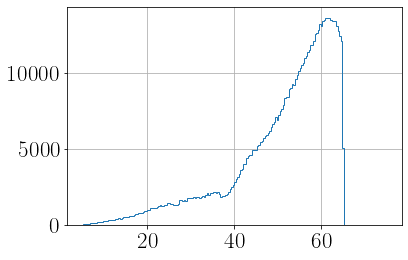

In [52]:
corr.Ptheta.hist(bins = np.linspace(5, 75, 201), histtype='step')
# noCorr.Ptheta.hist(bins = np.linspace(5, 75, 201), histtype='step')

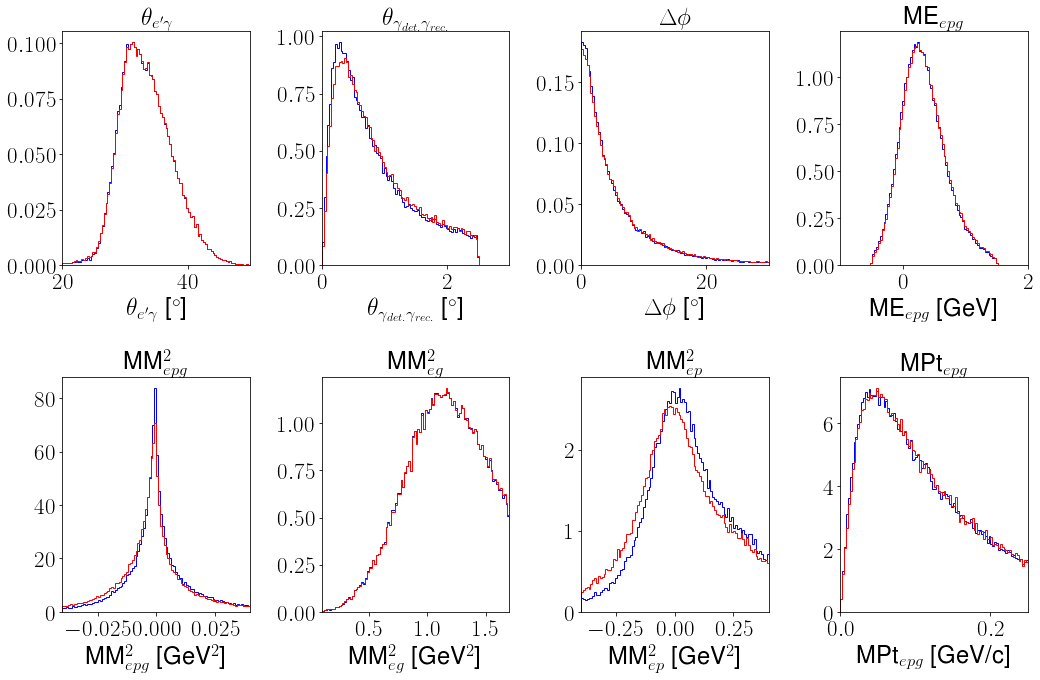

<Figure size 432x288 with 0 Axes>

In [55]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -1, -0.04, 0.1, -0.4 , 0]
binends = [50, 3, 30, 2, 0.04, 1.7, 0.4, 0.25]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
		axs[yind, xind].hist(corr.loc[corr.Psector<7, varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
		axs[yind, xind].hist(noCorr.loc[noCorr.Psector<7, varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		axs[yind, xind].set_xlim([start, end])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_1.pdf")
plt.clf()

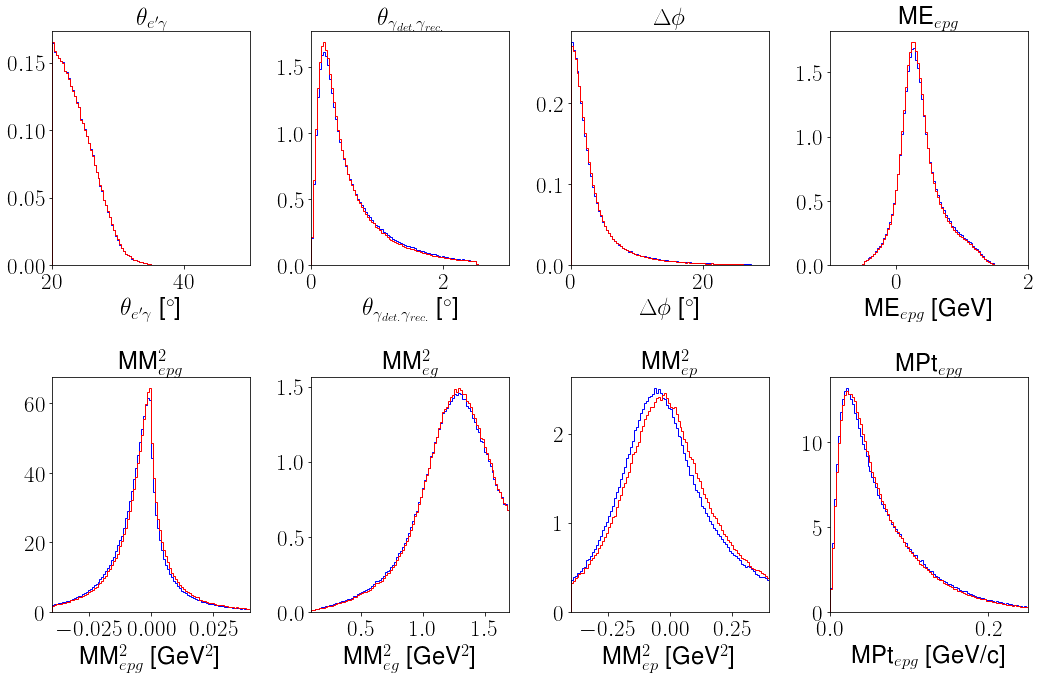

<Figure size 432x288 with 0 Axes>

In [63]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -1, -0.04, 0.1, -0.4 , 0]
binends = [50, 3, 30, 2, 0.04, 1.7, 0.4, 0.25]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 101)
		axs[yind, xind].hist(corr.loc[corr.Psector>7, varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
		axs[yind, xind].hist(noCorr.loc[noCorr.Psector>7, varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		axs[yind, xind].set_xlim([start, end])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_1.pdf")
plt.clf()

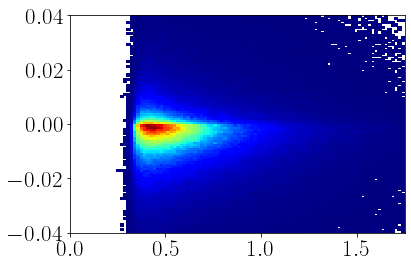

In [27]:
plt.hist2d(corr.loc[corr.Psector>7, "Pp"], corr.loc[corr.Psector>7, "MM2_epg"], bins = [np.linspace(0, 1.75, 101), np.linspace(-0.04, 0.04, 101)], cmap = cmap, cmin =1)
plt.show()

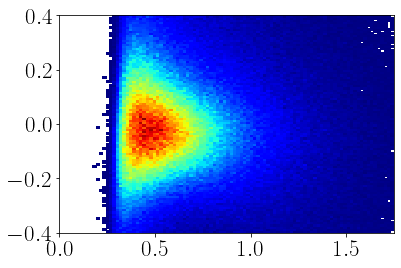

In [41]:
plt.hist2d(noCorr.loc[noCorr.Psector>7, "Pp"], noCorr.loc[noCorr.Psector>7, "MM2_ep"], bins = [np.linspace(0, 1.75, 101), np.linspace(-0.4, 0.4, 101)], cmap = cmap, cmin =1)
plt.show()

<AxesSubplot:>

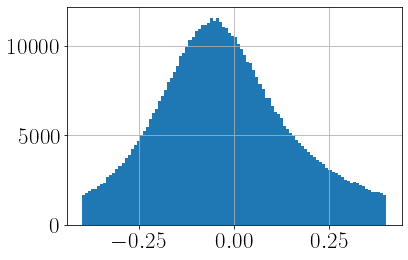

In [51]:
corr.loc[corr.Psector>7,"MM2_ep"].hist(bins = np.linspace(-0.4, 0.4, 101))

In [49]:
corr.loc[corr.Psector>7, "MM2_ep"].mean()

-0.01779028989537179

In [50]:
noCorr.loc[noCorr.Psector>7, "MM2_ep"].mean()

-0.003481098795644291